Vaccine Adverse Reactions (VAERS)

VAERS, the Vaccine Adverse Events Reporting System brought out through the 1986 act.  In 2016 VAERS received 59,117 reports as follows: 432 deaths, 1,091 permanent disabilities, 4,132 hospitalisations, 10,284 emergency room visits,           59,117 total adverse events reported in 2016.

Why is VAERS not working?

The most common reason given for not reporting is that the medical professionals haven’t got the time. Those that cannot be bothered to report such an event should be penalized. How about someone in the medical fraternity taking this critical situation seriously.  It beggars belief that this already set up source of surveillance on the effects of all vaccines, is not utilized to the utmost degree.
https://magnesiumandhealth.com/cdc-the-vaccine-fraud-part-6/

![](https://magnesiumandhealth.com/wp-content/uploads/2018/02/VAERS2.jpg)cdc.gov

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-vaccine-adverse-reactions/2021VAERSVAX.csv
/kaggle/input/covid19-vaccine-adverse-reactions/2021VAERSSYMPTOMS.csv
/kaggle/input/covid19-vaccine-adverse-reactions/2021VAERSDATA.csv


In [2]:
df = pd.read_csv('../input/covid19-vaccine-adverse-reactions/2021VAERSSYMPTOMS.csv', encoding='utf8')
pd.set_option('display.max_columns', None)
df.head()

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916710,Appendicitis,23.1,Band neutrophil percentage increased,23.1,Surgery,23.1,White blood cell count increased,23.1,NaN,NaN
1,916741,Chills,23.1,Complex regional pain syndrome,23.1,Fatigue,23.1,Headache,23.1,Joint range of motion decreased,23.1
2,916741,Myalgia,23.1,Pain in extremity,23.1,Peripheral swelling,23.1,X-ray abnormal,23.1,NaN,NaN
3,916742,Anaphylactic reaction,23.1,Blood test,23.1,Burning sensation,23.1,Central venous catheterisation,23.1,Dysphonia,23.1
4,916742,Intensive care,23.1,Pruritus,23.1,Rash,23.1,Rash macular,23.1,Throat tightness,23.1


In [3]:
df.isnull().sum()

VAERS_ID              0
SYMPTOM1              0
SYMPTOMVERSION1       0
SYMPTOM2            480
SYMPTOMVERSION2     480
SYMPTOM3            801
SYMPTOMVERSION3     801
SYMPTOM4           1059
SYMPTOMVERSION4    1059
SYMPTOM5           1246
SYMPTOMVERSION5    1246
dtype: int64

In [4]:
#https://www.kaggle.com/prestonfan/data-visualization-palmer-archipelago-penguins/notebook
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)

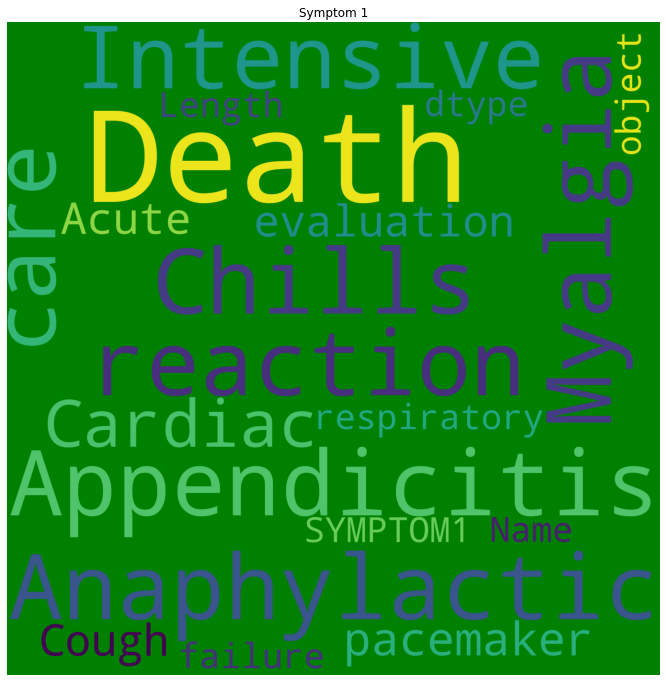

In [5]:
##Code by Taha07  https://www.kaggle.com/taha07/data-scientists-jobs-analysis-visualization/notebook

from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'green',
                      height =2000,
                      width = 2000
                     ).generate(str(df["SYMPTOM1"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Symptom 1")
plt.show()

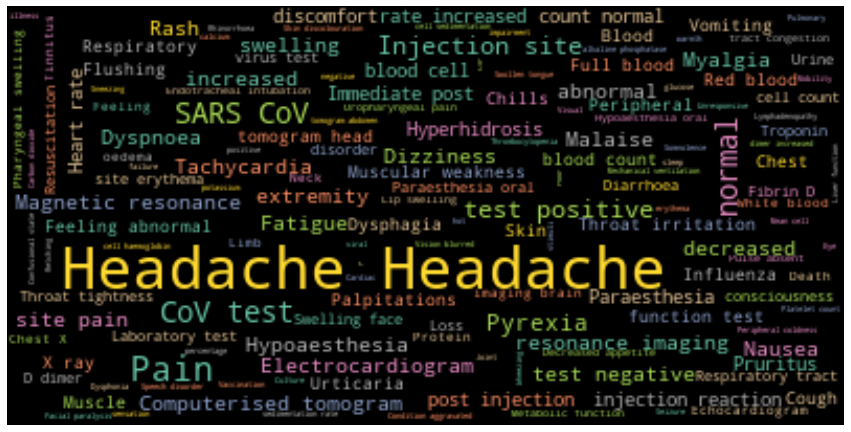

<Figure size 720x432 with 0 Axes>

In [6]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.SYMPTOM4)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Set2', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

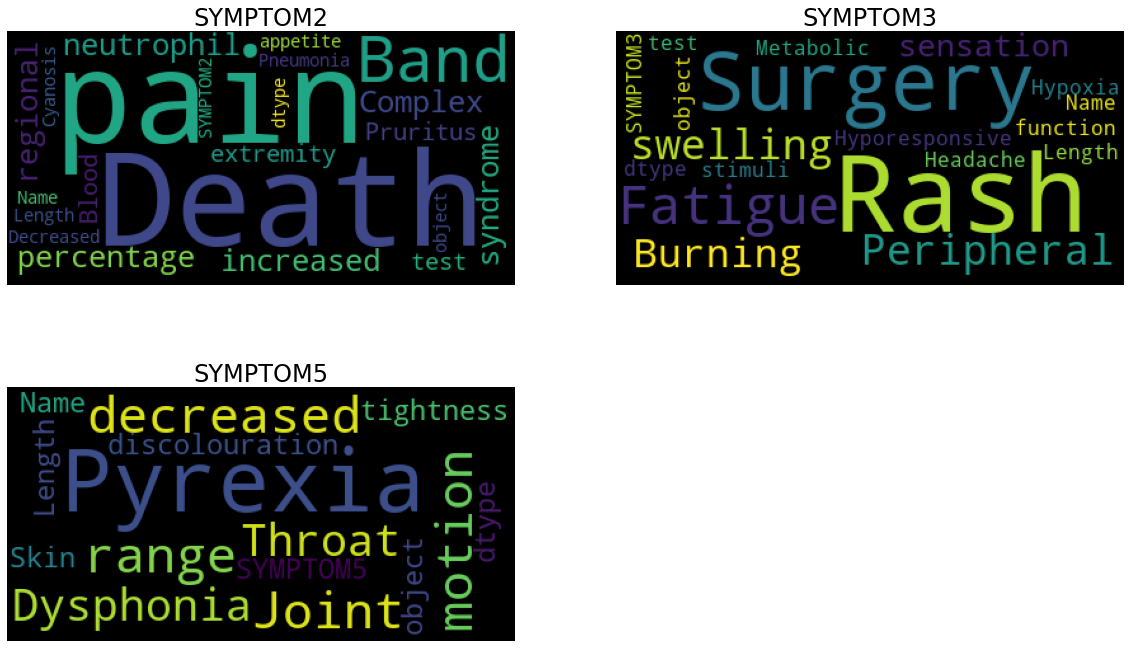

In [7]:
#Codes by Pooja Jain https://www.kaggle.com/jainpooja/av-guided-hackathon-predict-youtube-likes/notebook

text_cols = ['SYMPTOM2', 'SYMPTOM3', 'SYMPTOM5']

from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(df[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [8]:
fig = px.bar(df, 
             x='SYMPTOM1', y='SYMPTOMVERSION1', color_discrete_sequence=['#2B3A67'],
             title='Symptom 1', text='VAERS_ID')
fig.show()

In [9]:
! pip install -q dabl country_converter

In [10]:
import dabl
import warnings

Target looks like regression


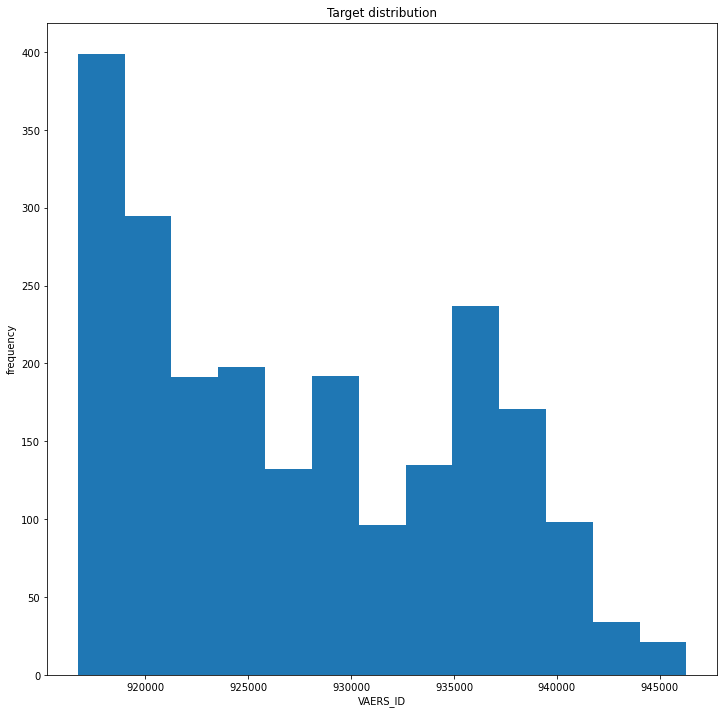

In [11]:
#plt.style.use('classic')
new_df = df[['VAERS_ID', 'SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']]
dabl.plot(new_df, target_col='VAERS_ID')

In [12]:
df1 = pd.read_csv('../input/covid19-vaccine-adverse-reactions/2021VAERSVAX.csv', encoding='utf8')
pd.set_option('display.max_columns', None)
df1.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916710,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916741,COVID19,PFIZER\BIONTECH,EH9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
2,916742,COVID19,PFIZER\BIONTECH,NaN,1,IM,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916746,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
4,916772,COVID19,PFIZER\BIONTECH,EJ1685,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [13]:
#Code from Gabriel Preda
#plt.style.use('dark_background')
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df1))
    g = sns.countplot(df1[feature], order = df1[feature].value_counts().index[:20], palette= ('#32a852', '#a84e32', '#3242a8'))
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



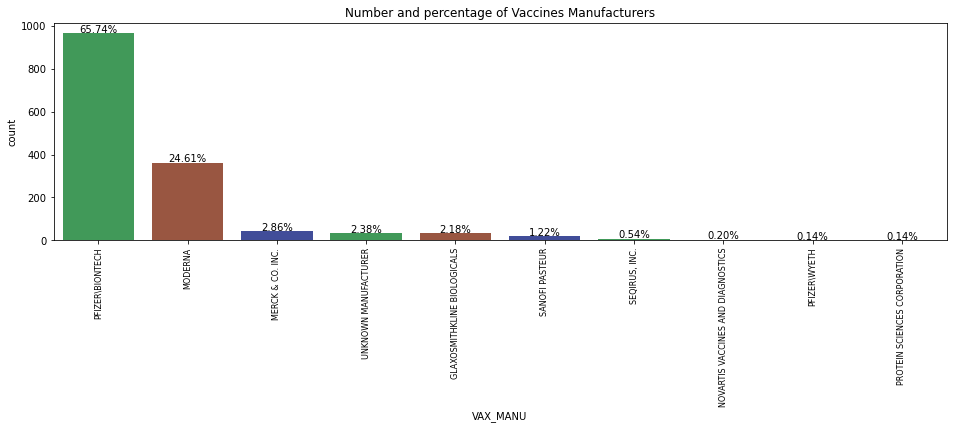

In [14]:
plot_count("VAX_MANU", "Vaccines Manufacturers", df1,4)

#Pycomp by Thiago Panini

In [15]:
!pip install pycomp

     |████████████████████████████████| 52 kB 511 kB/s 
     |████████████████████████████████| 294 kB 3.7 MB/s 
     |████████████████████████████████| 20.1 MB 18.4 MB/s 
     |████████████████████████████████| 215 kB 60.5 MB/s 
     |████████████████████████████████| 326 kB 47.2 MB/s 
     |████████████████████████████████| 9.5 MB 38.2 MB/s 
     |████████████████████████████████| 12.4 MB 50.5 MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp37-cp37m-linux_x86_64.whl size=468637 sha256=ec532f41a68d0218a803755e1b2f2fee4fd3dc171c46776711f397adc716a740
  Stored in directory: /root/.cache/pip/wheels/df/b8/18/2c0a6105152e62dd9a7cf47b5110b9cedb0c8739babdef64b7
Successfully built shap
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.0
    Uninstalling joblib-1.0.0:
      Successfully uninstalled joblib-1.0.0
  

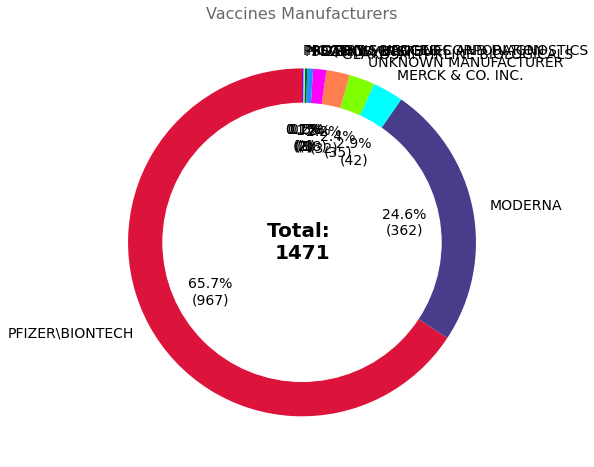

In [16]:
# Importing libraries
from pycomp.viz.insights import *

# Variable rate
manufacturer_colors = ['crimson', 'darkslateblue', 'cyan', 'chartreuse', 'coral', 'magenta', 'dodgerblue', 'darkgreen', 'aquamarine', 'darkviolet']
plot_donut_chart(df=df1, col='VAX_MANU',  colors=manufacturer_colors,
                 title='Vaccines Manufacturers')

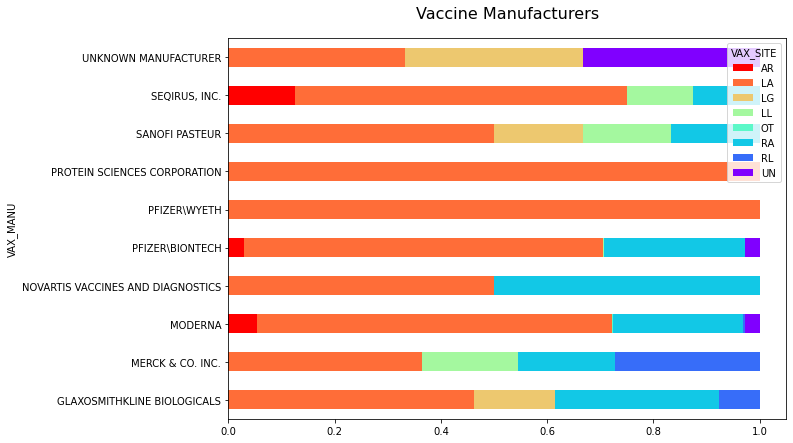

In [17]:
plot_pct_countplot(df=df1, col='VAX_MANU', hue='VAX_SITE', palette='rainbow_r',
                   title='Vaccine Manufacturers')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



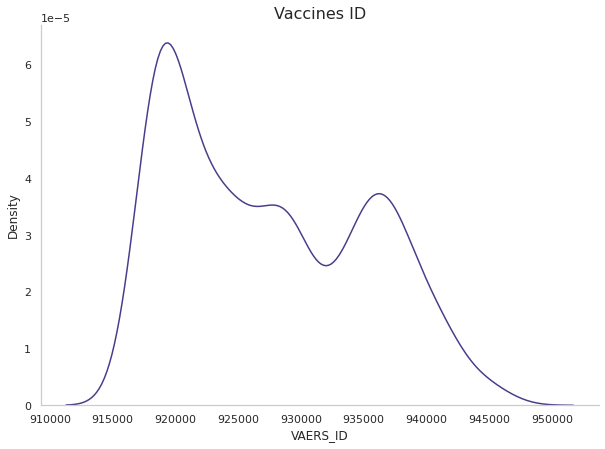

In [18]:
# Distribution of VAERS ID variable
plot_distplot(df=df1, col='VAERS_ID', title="Vaccines ID")

In [19]:
!pip install pywaffle

     |████████████████████████████████| 526 kB 2.9 MB/s 


In [20]:
variable = df1["VAX_MANU"].value_counts()

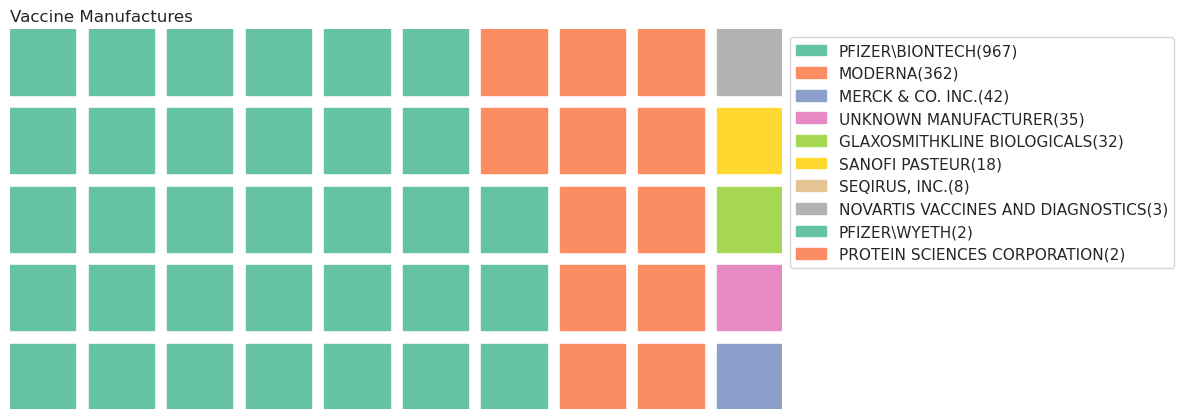

In [21]:
from pywaffle import Waffle

plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=variable,
    title={'label': 'Vaccine Manufactures', 'loc': 'left'},
    labels=["{}({})".format(a, b) for a, b in zip(variable.index, variable) ],
    # Set the position of the legend
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    dpi=100
)
plt.show()

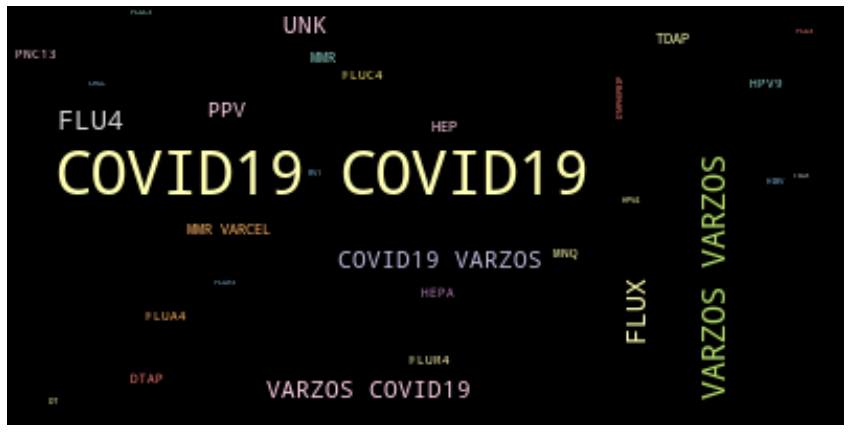

<Figure size 720x432 with 0 Axes>

In [22]:
#word cloud
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df1.VAX_TYPE)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [23]:
#Code by Olga Belitskaya https://www.kaggle.com/olgabelitskaya/sequential-data/comments
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#4251f5','#42a7f5','Akronim','Smokum',30,15
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h1>"""%string))
    
    
dhtml('Be patient. Marília Prata, @mpwolke was Here.' )